# Sentiment Analysis Project

 - Sentiment analysis on myanimelist user reviews. Reviews will be ranked Positive, Negative or Neutral.

In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

import re

In [85]:
# loading the dataset

df = pd.read_csv("C:/Users/nikau/OneDrive/Desktop/IOD/DataSets/reviews.csv")

In [86]:
df.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,\n \n \n \n ...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,\n \n \n \n ...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,\n \n \n \n ...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,\n \n \n \n ...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [87]:
df.shape

(192112, 7)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192112 entries, 0 to 192111
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   uid        192112 non-null  int64 
 1   profile    192112 non-null  object
 2   anime_uid  192112 non-null  int64 
 3   text       192112 non-null  object
 4   score      192112 non-null  int64 
 5   scores     192112 non-null  object
 6   link       192112 non-null  object
dtypes: int64(3), object(4)
memory usage: 10.3+ MB


In [89]:
print(f'Original Dataset : {df.shape}')


# using a small portion of dataset 

df = df.head(3000)
print(f'Sample Dataset : {df.shape}')

Original Dataset : (192112, 7)
Sample Dataset : (3000, 7)


## Quick EDA

In [90]:
# percentage of the sample dataset

percentage = (df['score'].value_counts())/(np.sum(df['score'].value_counts()))
percentage

9     0.228667
8     0.215000
10    0.197000
7     0.138000
6     0.086667
5     0.049000
4     0.036000
3     0.028333
2     0.011667
1     0.009667
Name: score, dtype: float64

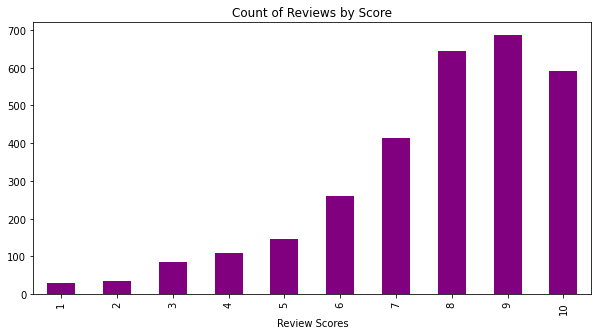

In [91]:
ax = df['score'].value_counts().sort_index() \
        .plot(kind='bar',title='Count of Reviews by Score',
             figsize=(10,5), color='purple')
ax.set_xlabel('Review Scores')
plt.show()

## NLTK

In [92]:
# taking random text as example

example = df['text'][500]
example

"\n           \n         \n           \n             \n           \n         \n         \n           more pics \n         \n       \n         \n       \n         \n           Overall \n           6 \n         \n         \n           Story \n           6 \n         \n                   \n             Animation \n             7 \n           \n           \n             Sound \n             6 \n           \n                 \n           Character \n           5 \n         \n         \n           Enjoyment \n           7 \n         \n       \n     \n\n                    \n    Looking at the score, you might think I belong to the 'Anti K-ON' fraction. I am not necessarily a hater, since in terms of slice-of-life genre, K-ON is better than most anime out there.  \r\n \r\nIf you want to look at this series on the positive light, think of it as a filler. Think of it as a plotless story with cute girls gathering and playing around. Think not of it as a story about the birth of a band. \r\n \r\n

In [93]:
# function to remove the "\n \r"

uid = 255938
text = df[df['uid'] == uid].text.values[0]

def clean_up_text(text):
    doc = re.sub("[\(\[].*?[\)\]]", "", text)
    doc = doc.replace(u'\n', u'').replace(u'\r', u'')
    return doc

doc = clean_up_text(text)
print(doc)

                                                                                    more pics                                                     Overall            8                              Story            8                                          Animation              8                                    Sound              10                                        Character            9                              Enjoyment            8                                              First things first. My "reviews" system is explained on a blog entry. Which can be found through my profile. ------  I'm going to keep this "review" more of a opinion of Gintama's overall and then this season specific.  Anyhow. What I have always loved regarding Gintama, is its content of everything. I love the comedy, its absurd, random, can be vile, dirty, sweet, anyhow, everything. Have laughed countless times in this franchise. Also the humor they have also is heavily reference based, a.k.a par

In [94]:
# we apply the function to the entire text and create a new clean text column

df['text'] = df['text'].map(lambda x: clean_up_text(x))
df.head()

,uid,profile,anime_uid,text,score,scores,link
0,255938,DesolatePsyche,34096,...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938
1,259117,baekbeans,34599,...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117
2,253664,skrn,28891,...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664
3,8254,edgewalker00,2904,...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254
4,291149,aManOfCulture99,4181,...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149


In [95]:
# labes are added for sentiment analysis

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download("vader_lexicon")

# https://www.kaggle.com/datasets/nltkdata/vader-lexicon 
# lexicon is widely used for sentiment analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\nikau\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [96]:
sentiments = SentimentIntensityAnalyzer()

# we create the columns Positive, Negative, Neutral and Compound which determines the scores of feelings thanks to the SentimentIntensityAnalyzer

df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["text"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["text"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["text"]]
df['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in df["text"]]
df.head()

,uid,profile,anime_uid,text,score,scores,link,Positive,Negative,Neutral,Compound
0,255938,DesolatePsyche,34096,...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938,0.218,0.096,0.686,0.9984
1,259117,baekbeans,34599,...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117,0.192,0.083,0.725,0.9989
2,253664,skrn,28891,...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,0.200,0.050,0.749,0.9871
3,8254,edgewalker00,2904,...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254,0.137,0.086,0.777,0.9965
4,291149,aManOfCulture99,4181,...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149,0.220,0.056,0.724,0.9965


In [97]:
# We create a new column Sentiment in which if the Compound is greater than 0.05 = positive, less than -0.05 negative otherwise it is neutral

score = df["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
df["Sentiment"] = sentiment
df.head()

,uid,profile,anime_uid,text,score,scores,link,Positive,Negative,Neutral,Compound,Sentiment
0,255938,DesolatePsyche,34096,...,8,"{'Overall': '8', 'Story': '8', 'Animation': '8...",https://myanimelist.net/reviews.php?id=255938,0.218,0.096,0.686,0.9984,Positive
1,259117,baekbeans,34599,...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=259117,0.192,0.083,0.725,0.9989,Positive
2,253664,skrn,28891,...,7,"{'Overall': '7', 'Story': '7', 'Animation': '9...",https://myanimelist.net/reviews.php?id=253664,0.200,0.050,0.749,0.9871,Positive
3,8254,edgewalker00,2904,...,9,"{'Overall': '9', 'Story': '9', 'Animation': '9...",https://myanimelist.net/reviews.php?id=8254,0.137,0.086,0.777,0.9965,Positive
4,291149,aManOfCulture99,4181,...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291149,0.220,0.056,0.724,0.9965,Positive


In [98]:
# Distribution of data by sentiment

df["Sentiment"].value_counts()

Positive    2792
Negative     206
Neutral        2
Name: Sentiment, dtype: int64

In [99]:
df.to_csv("reviews_animes_labels.csv")

## Train Test Split and Bootstrapping

In [100]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=1)


 - As we have seen before, in the distribution of feelings, classes are not balanced, which can cause problems when measuring accuracy because each class will have different base values. A resampling method with replacement is used, called bootstrapping.The smallest classes are oversampled and the remaining positive class is undersampled to 800 samples each.

In [101]:
t_1 = train[train['Sentiment']=='Neutral'].sample(800,replace=True)
t_2 = train[train['Sentiment']=='Positive'].sample(800,replace=True)
t_3 = train[train['Sentiment']=='Negative'].sample(800,replace=True)
training_bs = pd.concat([t_1, t_2, t_3])

In [102]:
print(train.shape)
print(training_bs.shape)
print(test.shape)

(2100, 12)
(2400, 12)
(900, 12)


In [104]:
# train distribution

train['Sentiment'].value_counts()

Positive    1956
Negative     143
Neutral        1
Name: Sentiment, dtype: int64

In [105]:
# test distribution

test['Sentiment'].value_counts()

Positive    836
Negative     63
Neutral       1
Name: Sentiment, dtype: int64

In [106]:
df.shape[0] == (train.shape[0] + test.shape[0])

True

#### Accuracy
The basic accuracy is the proportion of the majority class. Before bootstrapping, the positive sentiment was 93%. After bootstrapping all classes, the prediction accuracy of each class balances out, so the baseline accuracy is 33% for each class.

In [107]:
print(train['Sentiment'].value_counts(normalize=True))
baseline = 0.3

Positive    0.931429
Negative    0.068095
Neutral     0.000476
Name: Sentiment, dtype: float64


In [108]:
print (training_bs['Sentiment'].value_counts(normalize=True))
baseline = 0.3

Neutral     0.333333
Positive    0.333333
Negative    0.333333
Name: Sentiment, dtype: float64


In [110]:
# saving the datasets

train = training_bs.reset_index(drop=True)
train.to_csv('train.csv', header=True, index=False, encoding='UTF8')
training_bs = training_bs.reset_index(drop=True)
training_bs.to_csv('training_bs.csv', header=True, index=False, encoding='UTF8')
test = test.reset_index(drop=True)
test.to_csv('testing.csv', header=True, index=False, encoding='UTF8')

In [111]:
training_bs = pd.read_csv('training_bs.csv')
test = pd.read_csv('testing.csv')

In [112]:
# Define Class Integer Values
cleanup_nums = {"Sentiment": {"Negative": 1, "Neutral": 2, "Positive": 3}}

# Replace the Classes with Integer Values
training_bs.replace(cleanup_nums, inplace=True)

# Clean the Test Data
test.replace(cleanup_nums, inplace=True)

Text(0, 0.5, 'Labels')

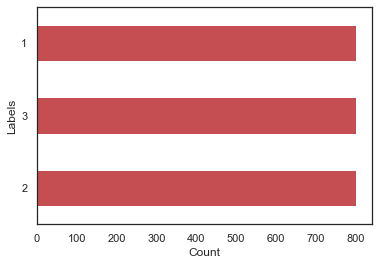

In [122]:
# Distribution of feelings in the "bootstrapped" training dataset

sns.set_theme(style="white")
ax = training_bs['Sentiment'].value_counts(sort=False).plot(kind='barh', color='r')
ax.set_xlabel('Count')
ax.set_ylabel('Labels')

Text(0, 0.5, 'Labels')

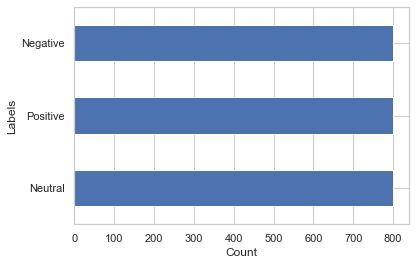

In [123]:
# Distribution of feelings in the non-bootstaped training dataset

sns.set_theme(style="whitegrid")
ax = train['Sentiment'].value_counts(sort=False).plot(kind='barh', color='b')
ax.set_xlabel('Count')
ax.set_ylabel('Labels')

### Naive Bayes Model
 
 - The algorithm calculates the probability of each word for a sequence of text and calculates the one with the highest score. For example, the probabilities of the words "like" and "good" appearing in the texts of the category "positive feeling" are higher than the probabilities of the categories "negative" or "neutral". In this way, the model predicts the probability that unknown text containing these words will be associated with either category.

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

# Create a pipeline which transforms phrases into normalized feature vectors and uses a bayes estimator
model_name = 'bayes classifier'

In [128]:
pipeline_bayes = Pipeline([
                ('count', CountVectorizer()),
# The vectorize counts the number of words in each text sequence and creates the word patterns
                ('tfidf', TfidfTransformer()),
# Reduces the impact of words that appear very often in training data
                ('gnb', MultinomialNB()),
                ])

# Train model using the created sklearn pipeline

model_bayes = pipeline_bayes.fit(training_bs['text'], training_bs['Sentiment'])

In [130]:
testphrases = ['Mondays just suck!', 'I love this product', 'That is a tree', 'Terrible service']
for testphrase in testphrases:
    resultx = model_bayes.predict([testphrase]) # use model_bayes for predictions with the other model
    dict = {1: 'Negative', 2: 'Neutral', 3: 'Positive'}
    print(testphrase + '-> ' + dict[resultx[0]])

Mondays just suck!-> Negative
I love this product-> Positive
That is a tree-> Positive
Terrible service-> Negative


In [131]:
dict = {1: 'Negative', 2: 'Neutral', 3: 'Positive'}
testphrase = "Anyhow. What I have always loved regarding Gintama, is its content of everything. I love the comedy, its absurd, random, can be vile, dirty, sweet, anyhow, everything. Have laughed countless times in this franchise. Also the humor they have also is heavily reference based, a.k.a parodies of different anime, shows, manga, live stuff, real world, anime production and so on. Anyhow, comedy/parody side of this franchise i absolutely love.  Now, 2nd side of this show is the serious dramas, epic battle shounens and so on.. There are arcs that are fully comedy, arcs that are fully serious and mixtures of both. Serious side is usually quite dramatic and managed to somewhat tear me up now and then. Whilst the action sequences are absolute bliss as well. They are just presented in a really cool manner. And extra points when sometime the add artistic element.  Of course it has its slice-of-life side and pseudo-romance. Those are weaker side, but ain't the focus. But when sometimes those are the 'focus', then they are done in enjoyable method.  To sum up overall gintama's, I love the serious side and the silly side.  Art and sound  is something I loved in all gintamas across the board. They just click with me, bliss to look at, bliss to hear. Music  specifically are hyped up and upbeat, which generally I don't like, but gintama is the exception where I love them. Art is cool, sometimes artistic, sometimes simple. It has a bit of everything that makes it enjoyable. And gore is absolutely satisfying as well.   Well, the serious side of stories in this anime are superb in my opinion. . But wouldn't say comedic side of series story is any worse.  When at times comedy side has 'story'. It's usually quite enjoyable.  Regarding characters I don't have much to say other than that variety, stereotypes of 'off-stereotypes' is very large. As well characters with depth but as well with oddity is as well in great selection. Main team. Gintoki the lazy dirty slob with superb second side of seriousness and caring about friends/allies. Shinpachi the poor straight-man-act sidekick, who adds great value to the team. Kagura, the battle race girl that doesn't act like girl almost at all, or in another words a dirty slob girl in a sense. -----------------  Now, to this season specific.  I found it a bit disappointing. Mainly because usually in gintama we have overly serious arcs or fully comedic, whilst this one had a bit of mixture of both, which somewhat ruined the experience. Plus the artistic presentation felt this time around a bit lacking. Maybe because of another studio, who knows. But anyhow, it didn't feel as superb. Rather than gintama it felt as watching just another good battle shounen anime in modern day with simplified animation.  I mean it definitely was not any bad, just didn't have the punch Gintama usually has. Might be because it was short series, maybe because it focused too much moving on with story. It'll be shame to see it finalized in this manner.  Rest I pretty much loved as usual in Gintama franchise."
r = model_bayes.predict([testphrase])
print(dict[r[0]])

Positive


###  Logistic Regression

 - This approach will divide our three-class prediction problem into two two-class problems. Our model differentiates between one class and all other classes in the first step. Then, all observations that do not fall into the first class enter a second model that predicts whether it is class two or three.

In [133]:
from sklearn.linear_model import LogisticRegression
# Create a transformation pipeline
# The pipeline sequentially applies a list of transforms and as a final estimator logistic regression 
pipeline_log = Pipeline([
                ('count', CountVectorizer()), 
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(solver='liblinear', multi_class='auto')),
        ])

# Train model using the created sklearn pipeline
model_name = 'logistic regression classifier'
model_lgr = pipeline_log.fit(training_bs['text'], training_bs['Sentiment'])

In [134]:
testphrases = ['Mondays just suck!', 'I love this product', 'That is a tree', 'Terrible service']
for testphrase in testphrases:
    resultx = model_lgr.predict([testphrase]) # use model_bayes for predictions with the other model
    dict = {1: 'Negative', 2: 'Neutral', 3: 'Positive'}
    print(testphrase + '-> ' + dict[resultx[0]])

Mondays just suck!-> Positive
I love this product-> Positive
That is a tree-> Positive
Terrible service-> Positive


In [135]:
dict = {1: 'Negative', 2: 'Neutral', 3: 'Positive'}
testphrase = "Anyhow. What I have always loved regarding Gintama, is its content of everything. I love the comedy, its absurd, random, can be vile, dirty, sweet, anyhow, everything. Have laughed countless times in this franchise. Also the humor they have also is heavily reference based, a.k.a parodies of different anime, shows, manga, live stuff, real world, anime production and so on. Anyhow, comedy/parody side of this franchise i absolutely love.  Now, 2nd side of this show is the serious dramas, epic battle shounens and so on.. There are arcs that are fully comedy, arcs that are fully serious and mixtures of both. Serious side is usually quite dramatic and managed to somewhat tear me up now and then. Whilst the action sequences are absolute bliss as well. They are just presented in a really cool manner. And extra points when sometime the add artistic element.  Of course it has its slice-of-life side and pseudo-romance. Those are weaker side, but ain't the focus. But when sometimes those are the 'focus', then they are done in enjoyable method.  To sum up overall gintama's, I love the serious side and the silly side.  Art and sound  is something I loved in all gintamas across the board. They just click with me, bliss to look at, bliss to hear. Music  specifically are hyped up and upbeat, which generally I don't like, but gintama is the exception where I love them. Art is cool, sometimes artistic, sometimes simple. It has a bit of everything that makes it enjoyable. And gore is absolutely satisfying as well.   Well, the serious side of stories in this anime are superb in my opinion. . But wouldn't say comedic side of series story is any worse.  When at times comedy side has 'story'. It's usually quite enjoyable.  Regarding characters I don't have much to say other than that variety, stereotypes of 'off-stereotypes' is very large. As well characters with depth but as well with oddity is as well in great selection. Main team. Gintoki the lazy dirty slob with superb second side of seriousness and caring about friends/allies. Shinpachi the poor straight-man-act sidekick, who adds great value to the team. Kagura, the battle race girl that doesn't act like girl almost at all, or in another words a dirty slob girl in a sense. -----------------  Now, to this season specific.  I found it a bit disappointing. Mainly because usually in gintama we have overly serious arcs or fully comedic, whilst this one had a bit of mixture of both, which somewhat ruined the experience. Plus the artistic presentation felt this time around a bit lacking. Maybe because of another studio, who knows. But anyhow, it didn't feel as superb. Rather than gintama it felt as watching just another good battle shounen anime in modern day with simplified animation.  I mean it definitely was not any bad, just didn't have the punch Gintama usually has. Might be because it was short series, maybe because it focused too much moving on with story. It'll be shame to see it finalized in this manner.  Rest I pretty much loved as usual in Gintama franchise."
r = model_lgr.predict([testphrase])
print(dict[r[0]])

Positive


#### Testing with the base train model

In [136]:
# Replace the Classes with Integer Values

train.replace(cleanup_nums, inplace=True)
train.head()

,uid,profile,anime_uid,text,score,scores,link,Positive,Negative,Neutral,Compound,Sentiment
0,221311,AniimeFreak,202,...,4,"{'Overall': '4', 'Story': '4', 'Animation': '5...",https://myanimelist.net/reviews.php?id=221311,0.145,0.159,0.697,-0.0429,2
1,221311,AniimeFreak,202,...,4,"{'Overall': '4', 'Story': '4', 'Animation': '5...",https://myanimelist.net/reviews.php?id=221311,0.145,0.159,0.697,-0.0429,2
2,221311,AniimeFreak,202,...,4,"{'Overall': '4', 'Story': '4', 'Animation': '5...",https://myanimelist.net/reviews.php?id=221311,0.145,0.159,0.697,-0.0429,2
3,221311,AniimeFreak,202,...,4,"{'Overall': '4', 'Story': '4', 'Animation': '5...",https://myanimelist.net/reviews.php?id=221311,0.145,0.159,0.697,-0.0429,2
4,221311,AniimeFreak,202,...,4,"{'Overall': '4', 'Story': '4', 'Animation': '5...",https://myanimelist.net/reviews.php?id=221311,0.145,0.159,0.697,-0.0429,2


In [138]:
# Create a pipeline which transforms phrases into normalized feature vectors and uses a bayes estimator
model_name = 'bayes classifier train dataset'

pipeline_bayes = Pipeline([
                ('count', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('gnb', MultinomialNB()),
                ])

# Train model using the created sklearn pipeline
model_bayes_train = pipeline_bayes.fit(train['text'], train['Sentiment'])

In [139]:
testphrases = ['Mondays just suck!', 'I love this product', 'That is a tree', 'Terrible service']
for testphrase in testphrases:
    resultx = model_bayes_train.predict([testphrase]) # use model_bayes for predictions with the other model
    dict = {1: 'Negative', 2: 'Neutral', 3: 'Positive'}
    print(testphrase + '-> ' + dict[resultx[0]])

Mondays just suck!-> Negative
I love this product-> Positive
That is a tree-> Positive
Terrible service-> Negative


### Model Performance Evaluation

In [141]:
# Naive Bayes

from sklearn.metrics import classification_report

# Predict class labels using the learner function
test['pred'] = model_bayes.predict(test['text'])
y_true = test['Sentiment']
y_pred = test['pred']
target_names = ['negative', 'neutral', 'positive']

results_log = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

              precision    recall  f1-score     support
negative       0.237500  0.603175  0.340807   63.000000
neutral        0.000000  0.000000  0.000000    1.000000
positive       0.964865  0.854067  0.906091  836.000000
accuracy       0.835556  0.835556  0.835556    0.835556
macro avg      0.400788  0.485747  0.415633  900.000000
weighted avg   0.912877  0.835556  0.865515  900.000000


C:\Users\nikau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [143]:
# Logistic Regression

# Predict class labels using the learner function
test['pred'] = model_lgr.predict(test['text'])
y_true = test['Sentiment']
y_pred = test['pred']
target_names = ['negative', 'neutral', 'positive']

results_log = classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
results_df_log = pd.DataFrame(results_log).transpose()
print(results_df_log)

              precision    recall  f1-score     support
negative       0.275862  0.507937  0.357542   63.000000
neutral        0.000000  0.000000  0.000000    1.000000
positive       0.960459  0.900718  0.929630  836.000000
accuracy       0.872222  0.872222  0.872222    0.872222
macro avg      0.412107  0.469551  0.429057  900.000000
weighted avg   0.911470  0.872222  0.888551  900.000000


C:\Users\nikau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nikau\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [146]:
test

,uid,profile,anime_uid,text,score,scores,link,Positive,Negative,Neutral,Compound,Sentiment,pred
0,159933,The_Goodsman,11887,...,8,"{'Overall': '8', 'Story': '9', 'Animation': '8...",https://myanimelist.net/reviews.php?id=159933,0.155,0.043,0.801,0.9986,3,3
1,325086,Horn_dawg_2019,39597,...,5,"{'Overall': '5', 'Story': '7', 'Animation': '7...",https://myanimelist.net/reviews.php?id=325086,0.088,0.056,0.856,0.9020,3,1
2,205310,toodaloola,28999,...,6,"{'Overall': '6', 'Story': '6', 'Animation': '8...",https://myanimelist.net/reviews.php?id=205310,0.167,0.129,0.703,0.9951,3,3
3,281105,Kannadin,35860,...,5,"{'Overall': '5', 'Story': '4', 'Animation': '7...",https://myanimelist.net/reviews.php?id=281105,0.174,0.123,0.702,0.9962,3,3
4,225527,TheMKninjaYT,30123,...,10,"{'Overall': '10', 'Story': '7', 'Animation': '...",https://myanimelist.net/reviews.php?id=225527,0.340,0.043,0.617,0.9996,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,291340,SPILTMILQ,5630,...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=291340,0.261,0.037,0.703,0.9942,3,3
896,63241,Xavirne,552,...,9,"{'Overall': '9', 'Story': '9', 'Animation': '8...",https://myanimelist.net/reviews.php?id=63241,0.341,0.049,0.610,0.9926,3,3
897,320191,Krunchyman,36369,...,5,"{'Overall': '5', 'Story': '5', 'Animation': '5...",https://myanimelist.net/reviews.php?id=320191,0.198,0.063,0.739,0.9957,3,3
898,16006,shinigamiallie,5630,...,10,"{'Overall': '10', 'Story': '10', 'Animation': ...",https://myanimelist.net/reviews.php?id=16006,0.251,0.023,0.726,0.9971,3,3
